In [1]:
import torch 
from torch import nn
from d2l import torch as d2l

In [ ]:
lambdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
train_losses, val_losses = [], []


In [8]:
"""Creating our Data"""
class Data(d2l.DataModule) :
    def __init__(self, num_train, num_val, num_inputs, batch_size) :
        self.save_hyperparameters()
        n = num_train+num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise
    
    def get_dataloader(self, train):
        i = slice(0,self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

In [5]:
def l2_penalty(w) :
    return (w ** 2).sum() /2 

In [6]:
class weightDecay(d2l.LinearRegression) :
    def __init__(self, wd, lr) :
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd
    
    def configure_optimizers(self):
        return torch.optim.SGD([{'params' : self.net.weight, 'weight_decay' :
                                 self.wd}, {'params' : self.net.bias}], lr=self.lr)

In [9]:
num_train, num_val, num_inputs, batch_size = 20, 100, 200, 5
data = Data(num_train, num_val, num_inputs, batch_size)

In [12]:
X_train, y_train = data.X[:num_train], data.y[:num_train]
X_val , y_val = data.X[num_train:], data.y[num_train:]

Train Loss : 0.0023, Val Loss : 0.0207


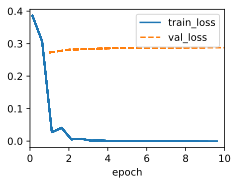

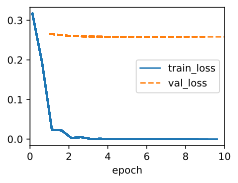

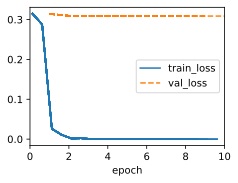

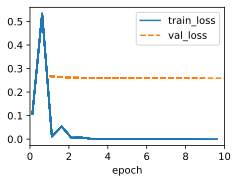

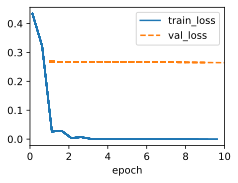

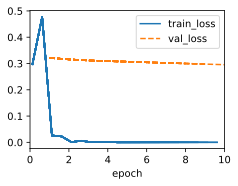

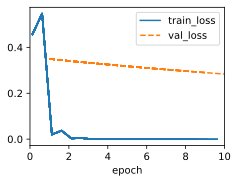

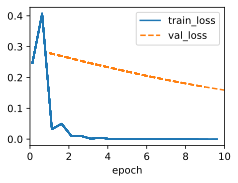

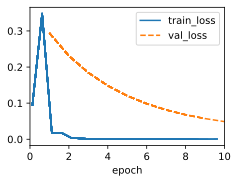

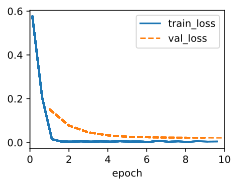

In [15]:
for lambd in lambdas :
    print(f"Traning with λ = {lambd}")

    # Creating our Model with current λ 
    model = weightDecay(wd=lambd, lr=0.01)

    # Training the Model
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)

    # Evaluating the losses
    with torch.no_grad() :
        y_pred_train = model(X_train)
        y_pred_val = model(X_val)

        mse_loss = nn.MSELoss()

        train_loss = mse_loss(y_pred_train, y_train).item()
        val_loss = mse_loss(y_pred_val, y_val).item()

        print(f"Train Loss : {train_loss:.4f}, Val Loss : {val_loss:.4f}")
        


    




    
